# Ejemplo 01:
Estas son las librerías que utilizaremos.

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
df = pd.read_csv('metro.csv')

df['tipo_pago'].unique()

df.rename(columns={'anio': 'año'}, inplace=True)

df['fecha'] = pd.to_datetime(df['fecha'])

df['dia_semana'] = df['fecha'].dt.day_name()

df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day

nuevo_orden = ['fecha', 'dia','mes','año',"dia_semana", 'linea', 'estacion', 'tipo_pago', 'afluencia']

# Reorganizar las columnas según el nuevo orden
df = df[nuevo_orden]

mapeo_dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplica la función de mapeo a la columna 'dia_semana' usando .loc
df.loc[:, 'dia_semana'] = df['dia_semana'].map(mapeo_dias_semana)
df

,fecha,dia,mes,año,dia_semana,linea,estacion,tipo_pago,afluencia
0,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Boleto,1848
1,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Prepago,790
2,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Gratuidad,325
3,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Boleto,1103
4,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Prepago,922
...,...,...,...,...,...,...,...,...,...
569200,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Prepago,25758
569201,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Gratuidad,2810
569202,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Boleto,0
569203,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Prepago,11293


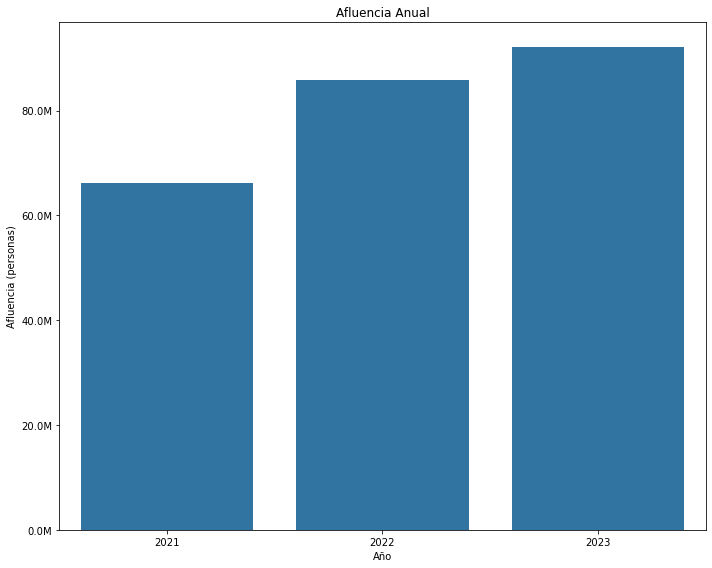

In [17]:
# Agrupar por año y mes, y calcular la suma de la afluencia en cada grupo
afluencia_por_mes_y_año = df.groupby(['año', 'mes'])['afluencia'].sum().reset_index()

# Crear una figura con dos subgráficos (uno para afluencia mensual y otro para afluencia anual)
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Función para formatear el eje y en millones
def millones(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Gráfico de afluencia anual
sns.barplot(x='año', y='afluencia', data=afluencia_por_mes_y_año, errorbar=None)
axes.set_title('Afluencia Anual')
axes.set_xlabel('Año')
axes.set_ylabel('Afluencia (personas)')
axes.yaxis.set_major_formatter(FuncFormatter(millones))  # Formatear el eje y en millones

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [5]:
df_copy = df.copy()
df_copy

,fecha,dia,mes,año,dia_semana,linea,estacion,tipo_pago,afluencia
0,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Boleto,1848
1,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Prepago,790
2,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Gratuidad,325
3,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Boleto,1103
4,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Prepago,922
...,...,...,...,...,...,...,...,...,...
569200,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Prepago,25758
569201,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Gratuidad,2810
569202,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Boleto,0
569203,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Prepago,11293


# Periodos de muestra

In [6]:
afluenciaSemanal = df_copy.groupby(pd.Grouper(key='fecha', freq='W'))['afluencia'].sum()
afluenciaSemanal = afluenciaSemanal.reset_index()
afluenciaSemanal['año'] = afluenciaSemanal['fecha'].dt.year
afluenciaSemanal

,fecha,afluencia,año
0,2021-01-03,3264500,2021
1,2021-01-10,11841665,2021
2,2021-01-17,7902883,2021
3,2021-01-24,8289952,2021
4,2021-01-31,9734642,2021
...,...,...,...
135,2023-08-06,20937792,2023
136,2023-08-13,21367172,2023
137,2023-08-20,21926542,2023
138,2023-08-27,22509876,2023


In [7]:
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'
def add_M(x, pos):
    return f'{x:.0f}M'

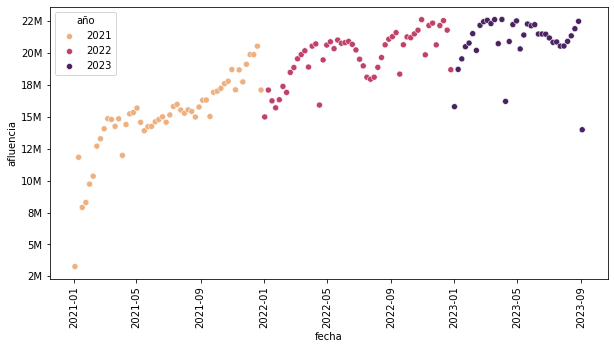

In [31]:
f, a1 = plt.subplots(1,1, figsize=(10,5))

plt.xticks(rotation=90)
a1 = sns.scatterplot(data=afluenciaSemanal,x='fecha', y='afluencia',hue='año', palette='flare')
a1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [70]:
#Convert datetime to numeric value and adding millions column to ease visualization
afluenciaSemanal['num_semana'] = (afluenciaSemanal['fecha']-afluenciaSemanal['fecha'].min()).dt.days//7+1
afluenciaSemanal['afluencia_millones'] = afluenciaSemanal['afluencia']/1e6

In [71]:
#Dividing data in training and testing sets
X = afluenciaSemanal['num_semana']
Y = afluenciaSemanal['afluencia_millones']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2, random_state=42)

In [72]:
afluenciaSemanal[['fecha','num_semana']]

,fecha,num_semana
0,2021-01-03,1
1,2021-01-10,2
2,2021-01-17,3
3,2021-01-24,4
4,2021-01-31,5
...,...,...
135,2023-08-06,136
136,2023-08-13,137
137,2023-08-20,138
138,2023-08-27,139


# Regresion lineal

In [73]:
# Training linear regression model and predicting results
lin_model = LinearRegression()
lin_model.fit(x_train.to_frame(),y_train)

y_pred_lin = lin_model.predict(x_test.to_frame())

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

In [74]:
# Testing model
mse = mean_squared_error(y_test,y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("Prueba: Regresion lineal...")
print("MSE: ", mse)
print("R2: ", r2)

Prueba: Regresion lineal...
MSE:  4.12244713678224
R2:  0.5727598629045303


/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype)

In [75]:
# Cross-validation testing
dfX = X.to_frame()
cv_mse = cross_val_score(lin_model, dfX, Y, cv=6, scoring='neg_mean_squared_error')
mseCV = -cv_mse.mean()
cv_r2 = cross_val_score(lin_model, dfX, Y, cv=6, scoring='r2')
r2CV = cv_r2.mean()

print("Prueba: Regresion lineal...")
print("MSE: ", mseCV)
print("R2: ", r2CV)

Prueba: Regresion lineal...
MSE:  6.890356373289592
R2:  -0.7790040846937881


/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

/home/juancho/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:772: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p = NX.asarray(p)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


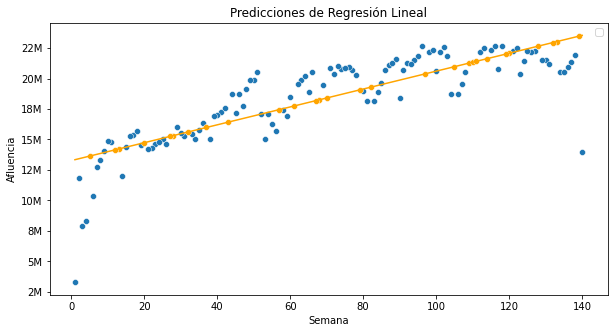

En conjunto de prueba...
MSE:  3.4360363137098213
r2 0.6438977682366964
Con validación cruzada...
MSE:  6.890356373289592
r2 -0.7790040846937881


In [92]:
# Visualizing results
f, a = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x=x_train, y=y_train)
sns.scatterplot(x=x_test, y=y_pred_lin, color='orange')
x = np.array(afluenciaSemanal['num_semana'])
y_lin = np.polyval([lin_model.coef_,lin_model.intercept_],x)
#np.polyval()
plt.plot(x,y_lin, color='orange')
a.yaxis.set_major_formatter(FuncFormatter(add_M))
plt.xlabel('Semana')
plt.ylabel('Afluencia')
plt.title('Predicciones de Regresión Lineal')
plt.legend()
plt.show()

# Imprimir los resultados
print("En conjunto de prueba...")
print('MSE: ', mse)
print('r2', r2)
print("Con validación cruzada...")
print('MSE: ', mseCV)
print('r2', r2CV)

# Regresion polinomial

In [78]:
# Training polynomial regression model and predicting results
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

xPolyTrain = poly.fit_transform(x_train.to_frame())
xPolyTest = poly.fit_transform(x_test.to_frame())

poly_model.fit(xPolyTrain,y_train)
y_pred_poly = poly_model.predict(xPolyTest)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

In [79]:
# Testing model
mse = mean_squared_error(y_test,y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print("Prueba: Regresion polinomial...")
print("MSE: ", mse)
print("R2: ", r2)

Prueba: Regresion polinomial...
MSE:  3.7394461451427574
R2:  0.6124531302155277


/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype)

In [68]:
# Cross-validation testing
dfX = X.to_frame()
cv_mse = cross_val_score(poly_model, dfX, Y, cv=5, scoring='neg_mean_squared_error')
mseCV = -cv_mse.mean()
cv_r2 = cross_val_score(poly_model, dfX, Y, cv=5, scoring='r2')
r2CV = cv_r2.mean()

print("Prueba: Regresion polinomial...")
print("MSE: ", mseCV)
print("R2: ", r2CV)

Prueba: Regresion polinomial...
MSE:  7.457331103467593
R2:  -0.9422341835987245


/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


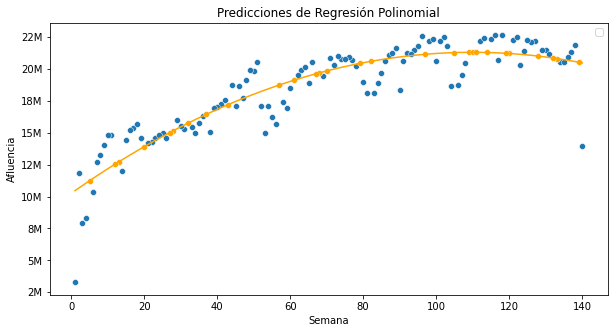

En conjunto de prueba...
MSE:  3.7394461451427574
r2 0.6124531302155277
Con validación cruzada...
MSE:  6.890356373289592
r2 -0.7790040846937881


In [80]:
# Visualizing results
f, a = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x=x_train, y=y_train)
sns.scatterplot(x=x_test, y=y_pred_poly, color='orange')
y_poly = np.polyval(poly_model.coef_[::-1],x) + poly_model.intercept_
plt.plot(x,y_poly, color='orange')
a.yaxis.set_major_formatter(FuncFormatter(add_M))
plt.xlabel('Semana')
plt.ylabel('Afluencia')
plt.title('Predicciones de Regresión Polinomial')
plt.legend()
plt.show()

# Imprimir los resultados
print("En conjunto de prueba...")
print('MSE: ', mse)
print('r2', r2)
print("Con validación cruzada...")
print('MSE: ', mseCV)
print('r2', r2CV)

# Modelo de crecimiento logistico

In [81]:
# Defining logistic function
def logistic_function(x,a,b,c):
    return a / (1 + np.exp(-b * (x - c)))

# Adjusting logistic function to data
params, covariance = curve_fit(logistic_function, x_train, y_train)
print(params)
a, b, c = params

# Predicting results for test set
y_pred_logistic = logistic_function(x_test, a, b, c)

[21.45967391  0.03695902  3.03411969]


/home/juancho/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [82]:
# Testing model
mse = mean_squared_error(y_test,y_pred_logistic)
r2 = r2_score(y_test, y_pred_logistic)

print("Prueba: Regresion polinomial...")
print("MSE: ", mse)
print("R2: ", r2)

Prueba: Regresion polinomial...
MSE:  3.4360363137098213
R2:  0.6438977682366964


/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


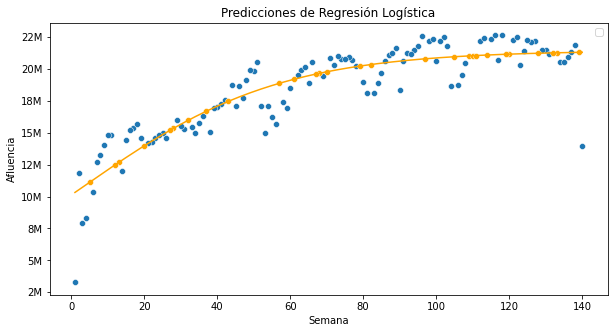

En conjunto de prueba...
MSE:  3.4360363137098213
r2 0.6438977682366964
Con validación cruzada...
MSE:  6.890356373289592
r2 -0.7790040846937881


In [90]:
# Visualizing results
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x=x_train, y=y_train)
sns.scatterplot(x=x_test, y=y_pred_logistic, color='orange')
y_log = logistic_function(x, params[0], params[1], params[2])
plt.plot(x,y_log, color='orange')
ax.yaxis.set_major_formatter(FuncFormatter(add_M))
plt.xlabel('Semana')
plt.ylabel('Afluencia')
plt.title('Predicciones de Regresión Logística')
plt.legend()
plt.show()

# Imprimir los resultados
print("En conjunto de prueba...")
print('MSE: ', mse)
print('r2', r2)
print("Con validación cruzada...")
print('MSE: ', mseCV)
print('r2', r2CV)

In [36]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

# Realiza la validación cruzada
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Define la función logística que quieres ajustar a tus datos
    def logistic_function(x, a, b, c):
        return a / (1 + np.exp(-b * (x - c)))

    # Ajusta la función logística a tus datos
    params, covariance = curve_fit(logistic_function, X_train, y_train)

    # Extrae los parámetros ajustados
    a, b, c = params
    
    y_pred = logistic_function(X_test, a, b, c)
      
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Calcula el MSE promedio en todos los pliegues
average_mse = sum(mse_scores) / num_folds
average_r2 = sum(r2_scores) / num_folds

print(f"Resultados de validación cruzada k-fold de regresión logistica (k={num_folds}):")

print(f"Promedio de MSE en todos los pliegues: {average_mse:.4f}")
print(f"Promedio de R2 en todos los pliegues: {average_r2:.4f}")

Resultados de validación cruzada k-fold de regresión logistica (k=5):
Promedio de MSE en todos los pliegues: 7.4507
Promedio de R2 en todos los pliegues: 0.4046


/home/juancho/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/uti

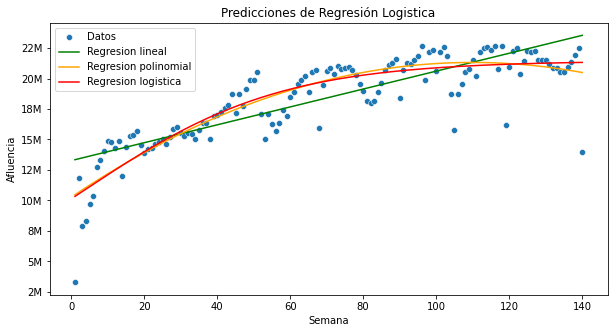

In [91]:
# Visualizing results
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.scatterplot(x=X, y=Y, label='Datos')
plt.plot(x,y_lin, color='g', label='Regresion lineal')
plt.plot(x,y_poly, color='orange', label='Regresion polinomial')
plt.plot(x,y_log, color='red', label='Regresion logistica')
ax.yaxis.set_major_formatter(FuncFormatter(add_M))
plt.xlabel('Semana')
plt.ylabel('Afluencia')
plt.title('Predicciones de Regresión Logistica')
plt.legend()
plt.show()

# Predicciones con el modelo

In [85]:
from datetime import datetime

# Define una función que toma una fecha en formato "YYYY-MM-DD" y devuelve el número personalizado de semana
def custom_week_number(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    base_date = datetime(2021, 1, 1)  # Fecha de inicio para asignar la semana 1
    weeks_difference = (date_obj - base_date).days // 7 + 1
    return weeks_difference

In [86]:
fecha = "2024-09-25"  #Fecha deseada
numero_semana = custom_week_number(fecha)
print(f"La fecha {fecha} corresponde a la semana {numero_semana} a partir del 1 de enero de 2021")

y_test_predict = logistic_function(numero_semana, a, b, c)
print(f"En esa fecha la afluencia del metro sera de {y_test_predict:.3f} millones de personas")

La fecha 2024-09-25 corresponde a la semana 195 a partir del 1 de enero de 2021
En esa fecha la afluencia del metro sera de 21.442 millones de personas
